In [1]:
from fft import *
import matplotlib.pyplot as plt

## Test 1: FFT2D/IFFT2D recovery

In [2]:
x = np.random.random((8, 8)) + 1j * np.random.random((8, 8))
X = FFT2D(x)
x_rec = IFFT2D(X)
print('Original 2D signal:')
print(x)
print('\nRecovered 2D signal:')
print(x_rec)
print('\nFFT2D/IFFT2D recovery successful:', arrays_almost_equal(x, x_rec))

Original 2D signal:
[[0.54238503+0.80346627j 0.72883448+0.30571423j 0.98538046+0.69955921j
  0.04832965+0.30961737j 0.49369818+0.51363073j 0.92109952+0.20171609j
  0.98765858+0.98669355j 0.39870904+0.66165529j]
 [0.22116985+0.43073813j 0.81461371+0.83847634j 0.99461684+0.9063992j
  0.62055378+0.82466485j 0.13958944+0.2717675j  0.45700727+0.199229j
  0.03975134+0.92624815j 0.90994961+0.10817636j]
 [0.35540087+0.82781748j 0.25310503+0.81706648j 0.75714736+0.40720232j
  0.46428798+0.65971249j 0.39659696+0.28776394j 0.18482975+0.23004236j
  0.28382538+0.54539621j 0.15674677+0.59839183j]
 [0.48690847+0.38271259j 0.52545546+0.28840597j 0.1751631 +0.29807258j
  0.23300831+0.68875699j 0.18477241+0.14987753j 0.92679597+0.94810014j
  0.29934371+0.79808041j 0.24135401+0.84011539j]
 [0.42299936+0.58496759j 0.84044957+0.70829583j 0.4900308 +0.33513969j
  0.05091075+0.16795771j 0.85580626+0.80433149j 0.57099207+0.99423868j
  0.01174992+0.01013391j 0.12539399+0.15041134j]
 [0.31277528+0.23645958j 0.5

## Test 2: 2D Linear Convolution via FFT vs. Direct Computation

In [3]:
signal = np.random.random((32, 32)) + 1j * np.random.random((32, 32))
filter = np.random.random((5, 5)) + 1j * np.random.random((5, 5))

y_direct = linear_convolution2d_direct(signal, filter)
y_fft = linear_convolution2d_fft(signal, filter)

print('\nDirect 2D convolution shape:', y_direct.shape)
print('FFT-based 2D convolution shape:', y_fft.shape)
print('Convolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))


Direct 2D convolution shape: (36, 36)
FFT-based 2D convolution shape: (36, 36)
Convolution and multiplication relationship holds: True


## Plot the results for visual verification

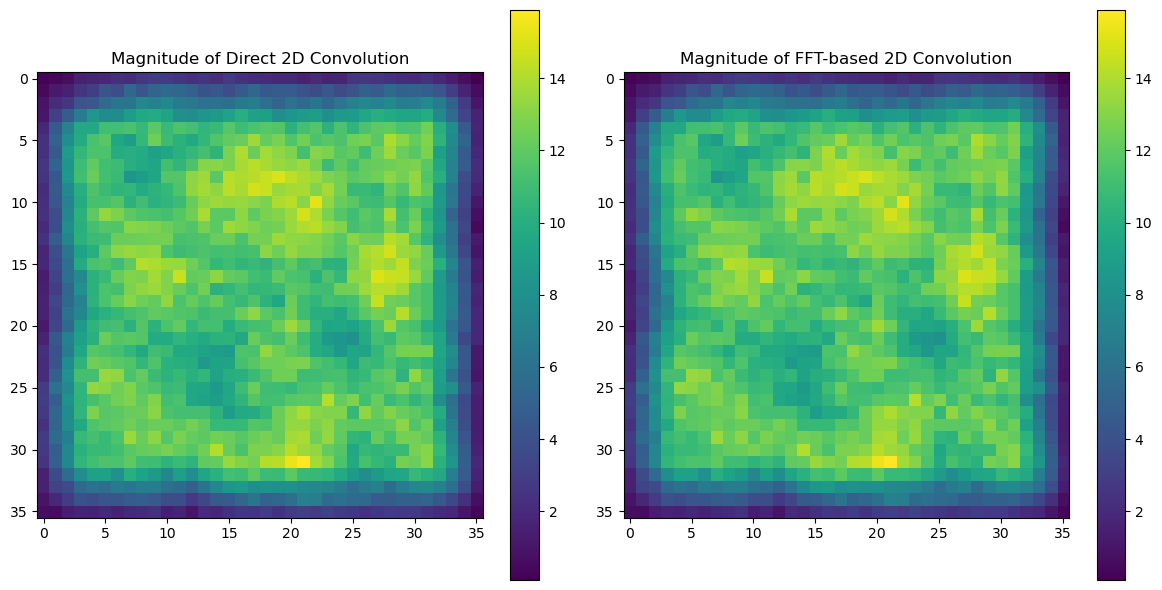

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(y_direct), cmap='viridis')
plt.title('Magnitude of Direct 2D Convolution')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.abs(y_fft), cmap='viridis')
plt.title('Magnitude of FFT-based 2D Convolution')
plt.colorbar()

plt.tight_layout()
plt.show()
